### For Future Iteration 
1. Preprocess simulated data again from beginning as the resampling could slightly impact the regression, etc.
2. Refine Kruskal Method to be an iterative process (although this is tricky to define in general- parameter sensitive)

In [2]:
import sys
sys.path.append('../pcqc')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pcqc import *
from kruskal_best_pcs import *

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
output_plots = 'pbmc_plots/pc_plots_pt3.pdf'
plot_dictionary = dict()

In [4]:
sim_data = pd.read_csv('data/pbmc_original_data.csv')

In [5]:
sim_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1830,1831,1832,1833,1834,1835,1836,1837,reduced_clustering,truth_names
0,0,-0.171470,-0.280812,-0.046677,-0.475169,-0.544024,4.928497,-0.038028,-0.280573,-0.341788,...,-0.102943,-0.222116,-0.312401,-0.121678,-0.521229,-0.098269,-0.209095,-0.531203,0,CD8
1,1,-0.214582,-0.372653,-0.054804,-0.683391,0.633951,-0.334837,-0.045589,-0.498264,-0.541914,...,0.007155,-0.445372,1.629285,-0.058662,-0.857163,-0.266844,-0.313146,-0.596654,2,CD4 T
2,2,-0.376888,-0.295085,-0.057527,-0.520972,1.332648,-0.309362,-0.103108,-0.272526,-0.500799,...,-0.071774,-0.297857,-0.410920,-0.070431,-0.590720,-0.158656,-0.170876,1.379000,2,CD4 T
3,3,-0.285241,-0.281735,-0.052227,-0.484929,1.572680,-0.271825,-0.074552,-0.258875,-0.416752,...,-0.093818,-0.247770,2.552079,-0.097402,1.631684,-0.119462,-0.179120,-0.505669,1,CD14+
4,4,-0.256484,-0.220394,-0.046800,-0.345859,-0.333409,-0.208122,-0.069514,5.806440,-0.283112,...,-0.167350,-0.098665,-0.275836,-0.139482,-0.310095,-0.006877,-0.109614,-0.461946,3,NK


In [6]:
data = sim_data.iloc[:,1:1839]

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837
0,-0.171470,-0.280812,-0.046677,-0.475169,-0.544024,4.928497,-0.038028,-0.280573,-0.341788,-0.195361,...,-0.226570,-0.236269,-0.102943,-0.222116,-0.312401,-0.121678,-0.521229,-0.098269,-0.209095,-0.531203
1,-0.214582,-0.372653,-0.054804,-0.683391,0.633951,-0.334837,-0.045589,-0.498264,-0.541914,-0.209017,...,-0.317531,2.568868,0.007155,-0.445372,1.629285,-0.058662,-0.857163,-0.266844,-0.313146,-0.596654
2,-0.376888,-0.295085,-0.057527,-0.520972,1.332648,-0.309362,-0.103108,-0.272526,-0.500799,-0.220228,...,-0.302938,-0.239801,-0.071774,-0.297857,-0.410920,-0.070431,-0.590720,-0.158656,-0.170876,1.379000
3,-0.285241,-0.281735,-0.052227,-0.484929,1.572680,-0.271825,-0.074552,-0.258875,-0.416752,-0.208471,...,-0.262978,-0.231807,-0.093818,-0.247770,2.552079,-0.097402,1.631684,-0.119462,-0.179120,-0.505669
4,-0.256484,-0.220394,-0.046800,-0.345859,-0.333409,-0.208122,-0.069514,5.806440,-0.283112,-0.199355,...,-0.202237,-0.176765,-0.167350,-0.098665,-0.275836,-0.139482,-0.310095,-0.006877,-0.109614,-0.461946


### Run PCQC

In [8]:
pca = PC_Cluster(n_pcs = 100)
pca.fit(data.values)
pca.norm_eigenvalues[0:20]

array([0.02012665, 0.01173268, 0.00979   , 0.00829639, 0.00301003,
       0.00249836, 0.00221046, 0.00202671, 0.0019566 , 0.00192758,
       0.00187948, 0.00185546, 0.00185016, 0.00184544, 0.0018264 ,
       0.0018171 , 0.00180573, 0.00179558, 0.00178203, 0.00177742])

In [9]:
pca.singular_values[0:40]

array([290.99080096, 222.17348561, 202.94800732, 186.82638292,
       112.53282036, 102.52284537,  96.43508072,  92.33988782,
        90.72860407,  90.05341191,  88.92259855,  88.35249282,
        88.22623294,  88.11364853,  87.65796801,  87.43456737,
        87.1606445 ,  86.91521122,  86.58669766,  86.47472017,
        86.40869143,  86.2086503 ,  85.98342176,  85.92890392,
        85.75879114,  85.59200334,  85.47530624,  85.3160535 ,
        85.21694634,  85.09497396,  84.95855928,  84.9111451 ,
        84.72571183,  84.57164795,  84.4181872 ,  84.38023223,
        84.12736681,  84.05184353,  84.01828338,  83.97280125])

In [10]:
pca.pc_distribution()
pca.df_pca_dist.head()

,PC_Dist_0,PC_Dist_1,PC_Dist_2,PC_Dist_3,PC_Dist_4,PC_Dist_5,PC_Dist_6,PC_Dist_7,PC_Dist_8,PC_Dist_9,...,PC_Dist_90,PC_Dist_91,PC_Dist_92,PC_Dist_93,PC_Dist_94,PC_Dist_95,PC_Dist_96,PC_Dist_97,PC_Dist_98,PC_Dist_99
0,7.370892e-06,1.606444e-08,1.292511e-09,1.906396e-06,7.261065e-10,5.039832e-11,8.045703e-08,2.232605e-06,2.098192e-06,8.986616e-07,...,5.884445e-07,4.264131e-07,4.772918e-09,2.397413e-07,1.362874e-07,1.280025e-08,5.251442e-07,2.731123e-07,6.852190e-07,7.353519e-07
1,1.239648e-05,1.331350e-05,1.582314e-08,1.516528e-05,2.142233e-06,3.533945e-09,1.377374e-06,2.673263e-07,9.679425e-08,1.036112e-07,...,6.678799e-07,3.869001e-07,5.825933e-07,1.911799e-06,3.678298e-07,2.147745e-07,3.178895e-08,4.375681e-07,3.846201e-08,6.771211e-07
2,1.741570e-06,5.944674e-07,7.209295e-08,1.190835e-06,7.645581e-07,9.006031e-07,9.957315e-07,6.073309e-07,2.144548e-07,4.646564e-07,...,1.234377e-07,4.954344e-08,3.424159e-07,2.001739e-07,4.047485e-07,7.668854e-08,1.507830e-06,1.421585e-07,9.687281e-07,1.292944e-10
3,2.439416e-05,4.436121e-07,4.155001e-07,1.063058e-07,2.014659e-06,2.377038e-10,4.016027e-07,3.709437e-08,1.898643e-07,2.240972e-11,...,1.405138e-07,5.920863e-07,4.571019e-09,1.144099e-08,3.633370e-08,1.242972e-07,6.656153e-08,3.338272e-07,6.862598e-08,4.297384e-07
4,2.877294e-07,1.578983e-05,4.921933e-07,4.236064e-06,9.113367e-07,7.657503e-06,3.707000e-08,4.738933e-09,1.475366e-07,3.288386e-09,...,2.781326e-07,1.219959e-07,1.459721e-07,4.126577e-08,4.443362e-07,3.575474e-07,7.323167e-07,2.246008e-07,1.700669e-06,8.497985e-11


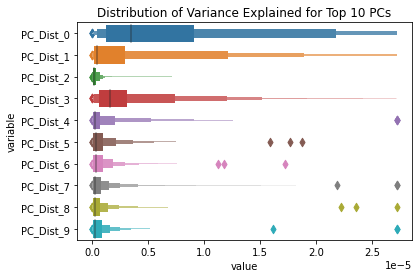

In [11]:
pc_distplot(pca, cols = np.arange(0,10))
plt.title('Distribution of Variance Explained for Top 10 PCs')
plot_dictionary['Boxenplot'] = plt.gca().get_figure()

In [12]:
pca.pc_stats(thresholds=[0.9,0.95,0.98,0.99,0.995])

In [13]:
#calls 99.5th percentile 100.0 by rounding
1e-6*pca.df_pc_stats.sort_values(by = '100.0_Percentile',
                                 ascending = False).head(20)

,90.0_Percentile,95.0_Percentile,98.0_Percentile,99.0_Percentile,100.0_Percentile,evalue,rank
PC_Dist_2,7.406829e-13,1.000187e-12,1.469928e-12,2.218325e-12,9.497100e-11,9.789995e-09,0.000003
PC_Dist_1,1.388939e-11,2.259476e-11,4.040342e-11,4.865603e-11,5.388433e-11,1.173268e-08,0.000002
PC_Dist_0,2.428705e-11,2.960248e-11,3.504858e-11,3.832355e-11,4.128527e-11,2.012665e-08,0.000001
PC_Dist_3,9.133196e-12,1.290561e-11,1.789261e-11,2.247810e-11,2.595241e-11,8.296393e-09,0.000004
PC_Dist_4,2.742280e-12,6.758979e-12,1.136969e-11,1.507173e-11,1.805102e-11,3.010033e-09,0.000005
PC_Dist_8,1.689392e-12,2.845167e-12,5.828197e-12,8.963401e-12,1.347299e-11,1.956597e-09,0.000009
PC_Dist_7,1.712253e-12,2.918925e-12,5.237493e-12,8.585746e-12,1.176387e-11,2.026710e-09,0.000008
PC_Dist_5,2.505716e-12,4.288814e-12,6.991696e-12,8.842575e-12,1.047459e-11,2.498355e-09,0.000006
PC_Dist_10,1.623228e-12,2.536529e-12,4.499679e-12,6.767708e-12,9.620682e-12,1.879478e-09,0.000011
PC_Dist_9,1.825889e-12,2.762171e-12,4.379484e-12,6.307722e-12,8.791372e-12,1.927584e-09,0.000010


In [106]:
1e-6*pca.df_pc_stats.sort_values(by = '98.0_Percentile',
                                 ascending = False).head(20)

,90.0_Percentile,95.0_Percentile,98.0_Percentile,99.0_Percentile,100.0_Percentile,evalue,rank
PC_Dist_1,1.388939e-11,2.259476e-11,4.040342e-11,4.865603e-11,5.388433e-11,1.173268e-08,0.000002
PC_Dist_0,2.428705e-11,2.960248e-11,3.504858e-11,3.832355e-11,4.128527e-11,2.012665e-08,0.000001
PC_Dist_3,9.133196e-12,1.290561e-11,1.789261e-11,2.247810e-11,2.595241e-11,8.296393e-09,0.000004
PC_Dist_4,2.742280e-12,6.758979e-12,1.136969e-11,1.507173e-11,1.805102e-11,3.010033e-09,0.000005
PC_Dist_5,2.505716e-12,4.288814e-12,6.991696e-12,8.842575e-12,1.047459e-11,2.498355e-09,0.000006
PC_Dist_8,1.689392e-12,2.845167e-12,5.828197e-12,8.963401e-12,1.347299e-11,1.956597e-09,0.000009
PC_Dist_6,2.160315e-12,3.373650e-12,5.279864e-12,7.003751e-12,8.755422e-12,2.210462e-09,0.000007
PC_Dist_7,1.712253e-12,2.918925e-12,5.237493e-12,8.585746e-12,1.176387e-11,2.026710e-09,0.000008
PC_Dist_10,1.623228e-12,2.536529e-12,4.499679e-12,6.767708e-12,9.620682e-12,1.879478e-09,0.000011
PC_Dist_14,1.882424e-12,2.769614e-12,4.385139e-12,5.289298e-12,6.074676e-12,1.826399e-09,0.000015


In [105]:
1e-6*pca.df_pc_stats.sort_values(by = '95.0_Percentile',
                                 ascending = False).head(20)

,90.0_Percentile,95.0_Percentile,98.0_Percentile,99.0_Percentile,100.0_Percentile,evalue,rank
PC_Dist_0,2.428705e-11,2.960248e-11,3.504858e-11,3.832355e-11,4.128527e-11,2.012665e-08,0.000001
PC_Dist_1,1.388939e-11,2.259476e-11,4.040342e-11,4.865603e-11,5.388433e-11,1.173268e-08,0.000002
PC_Dist_3,9.133196e-12,1.290561e-11,1.789261e-11,2.247810e-11,2.595241e-11,8.296393e-09,0.000004
PC_Dist_4,2.742280e-12,6.758979e-12,1.136969e-11,1.507173e-11,1.805102e-11,3.010033e-09,0.000005
PC_Dist_5,2.505716e-12,4.288814e-12,6.991696e-12,8.842575e-12,1.047459e-11,2.498355e-09,0.000006
PC_Dist_6,2.160315e-12,3.373650e-12,5.279864e-12,7.003751e-12,8.755422e-12,2.210462e-09,0.000007
PC_Dist_7,1.712253e-12,2.918925e-12,5.237493e-12,8.585746e-12,1.176387e-11,2.026710e-09,0.000008
PC_Dist_8,1.689392e-12,2.845167e-12,5.828197e-12,8.963401e-12,1.347299e-11,1.956597e-09,0.000009
PC_Dist_22,1.756886e-12,2.832771e-12,4.171276e-12,5.263365e-12,6.681996e-12,1.757286e-09,0.000023
PC_Dist_14,1.882424e-12,2.769614e-12,4.385139e-12,5.289298e-12,6.074676e-12,1.826399e-09,0.000015


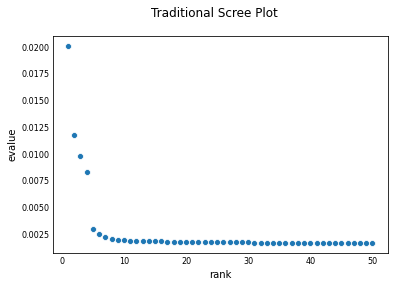

In [14]:
scatter_scree_plot(pca)
plot_dictionary['Traditional Scree Plot'] = plt.gca().get_figure()

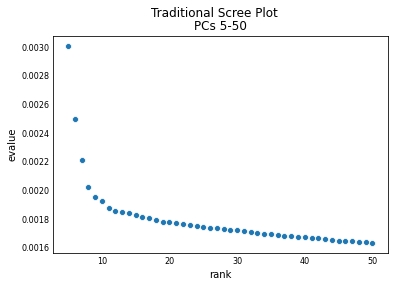

In [15]:
#Top 7/8 PC's seem most significant according to scree plot
scatter_scree_plot(pca, rank = np.arange(5,51))
plt.title('PCs 5-50')
plot_dictionary['Traditional Scree Plot, 5-50'] = plt.gca().get_figure()

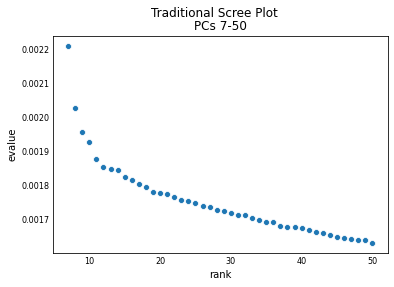

In [16]:
scatter_scree_plot(pca, rank = np.arange(7,51))
plt.title('PCs 7-50')
plot_dictionary['Traditional Scree Plot, 7-50'] = plt.gca().get_figure()

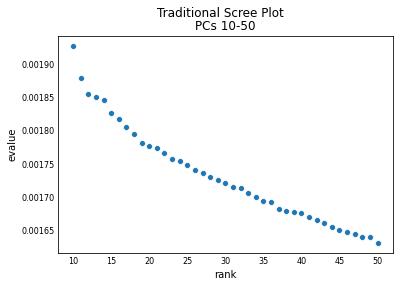

In [18]:
#Top 7/8 PC's seem most significant according to scree plot
scatter_scree_plot(pca, rank = np.arange(10,51))
plt.title('PCs 10-50')
plot_dictionary['Traditional Scree Plot, 10-50'] = plt.gca().get_figure()

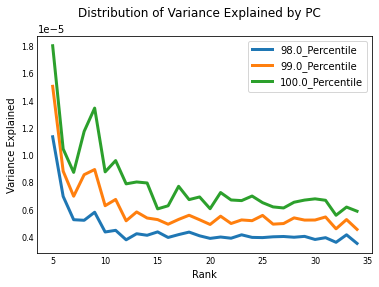

In [19]:
fig = dist_var_pc_plot(pca, rank = np.arange(5,35), threshold_subset = ['98.0_Percentile',
                                                                        '99.0_Percentile',
                                                                        '100.0_Percentile'])
plot_dictionary['PCQC_NotSorted'] = plt.gca().get_figure()

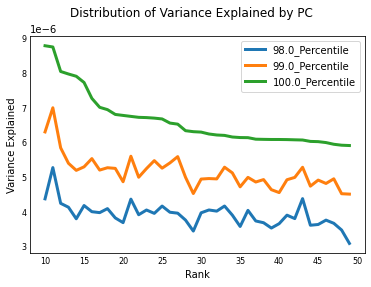

In [20]:
#somewhere between 15 and 30 from PCQC
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(10,50), sort_var = '100.0_Percentile', 
                             threshold_subset =                       ['98.0_Percentile',
                                                                        '99.0_Percentile',
                                                                        '100.0_Percentile'])
plot_dictionary['PCQC_Sorted'] = plt.gca().get_figure()

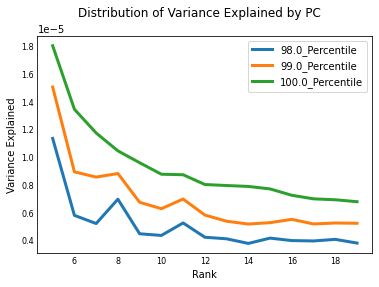

In [109]:
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(5,20), sort_var = '100.0_Percentile', 
                             threshold_subset =                       ['98.0_Percentile',
                                                                        '99.0_Percentile',
                                                                        '100.0_Percentile'])
plot_dictionary['PCQC_Sortedv2'] = plt.gca().get_figure()

In [21]:
def compute_gap(df, var_name):
    nrows = df.shape[0]
    df = df.sort_values(by = var_name,ascending = False).reset_index()
    ratios = np.divide(df.loc[0:nrows-2,var_name].values,df.loc[1:nrows-1,var_name].values)
    top_args = np.argsort(-1*ratios)
    top_gaps = -1*np.sort(-1*ratios)
    gap_stats = pd.DataFrame(top_args, columns = ['args'])
    gap_stats['gaps'] = top_gaps
    return gap_stats

In [22]:
gap_stats = compute_gap(pca.df_pc_stats,'evalue')

In [23]:
#Top 7
gap_stats[0:10]

,args,gaps
0,3,2.756246
1,0,1.715434
2,4,1.204806
3,1,1.198436
4,2,1.180030
5,5,1.130241
6,6,1.090665
7,7,1.035834
8,9,1.025595
9,8,1.015052


In [24]:
gap_stats = compute_gap(pca.df_pc_stats,'100.0_Percentile')

In [25]:
#Top 9, possibly Top 11
gap_stats[0:12]

,args,gaps
0,0,1.762498
1,2,1.590807
2,3,1.437725
3,4,1.339793
4,1,1.305171
5,5,1.145286
6,6,1.123086
7,8,1.094332
8,7,1.088758
9,10,1.087619


In [26]:
#possibly top 7
gap_stats = compute_gap(pca.df_pc_stats,'99.0_Percentile')
gap_stats[0:12]

,args,gaps
0,1,1.704928
1,3,1.681475
2,98,1.644535
3,2,1.491408
4,0,1.269612
5,6,1.225878
6,9,1.078301
7,8,1.072924
8,96,1.050258
9,10,1.043260


In [102]:
#top 8
gap_stats = compute_gap(pca.df_pc_stats,'98.0_Percentile')
gap_stats[0:12]

,args,gaps
0,98,2.022692
1,1,1.958830
2,3,1.626170
3,2,1.573712
4,4,1.199633
5,7,1.163970
6,0,1.152784
7,5,1.103854
8,11,1.028488
9,8,1.026120


In [103]:
#top 6
gap_stats = compute_gap(pca.df_pc_stats,'95.0_Percentile')
gap_stats[0:12]

,args,gaps
0,98,2.108330
1,2,1.909402
2,1,1.750771
3,3,1.575955
4,0,1.310148
5,4,1.271268
6,5,1.155785
7,6,1.025924
8,8,1.022803
9,13,1.020322


### What about Kruskal?

__1. Use subset of PC's: Top 20__

In [27]:
pca.select_top_pcs(criteria = 'evalue', n_top_pcs = 20)

In [28]:
reduced_matrix = pca.use_top_pcs()

In [29]:
reduced_matrix.shape

(2638, 20)

In [30]:
def compute_best_pcs(reduced_matrix, n_neighbors, resolution, threshold = 1e-6, max_discard = 20):
    #max discard, max number of pcs that are discarded in a single round 
    df = pd.DataFrame(reduced_matrix)
    finished = False
    index = 0
    while not finished:
        adata = sc.AnnData(X = reduced_matrix)
        sc.pp.neighbors(adata, n_neighbors = n_neighbors, use_rep = 'X')
        sc.tl.leiden(adata, resolution = resolution, random_state = np.random.randint(100))
        df['Clusters'] = adata.obs['leiden'].values
        valid_cols = [col for col in df.columns if col != 'Clusters']
        kruskal_test, best_pcs = pc_kruskal_test(df,valid_cols, threshold = threshold)
        candidates_to_elim = np.where(np.array(kruskal_test) > threshold)
        #get max discard lowest values
        #print(kruskal_test)
        #print(candidates_to_elim)
        
        lowest_values = np.argsort(-1*np.array(kruskal_test))[0:max_discard]
        #print(lowest_values)
        to_discard = []
        for value in lowest_values:
            if kruskal_test[value] > threshold:
                to_discard.append(value)
        #print(to_discard)
        to_keep = [col for i,col in enumerate(df.columns) if i not in to_discard]
        if len(to_discard) == 0:
            finished = True
        else:
            df = df[to_keep]
            reduced_matrix = df.values
        
    return df,kruskal_test

In [31]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [32]:
y = np.log10(np.array(kruskal)+1e-300)

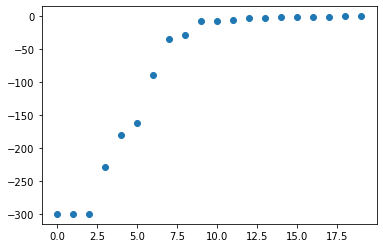

In [33]:
#good threshold would be between 1e-40, 1e-50
plt.scatter(x = np.arange(len(y)), y = np.sort(y))
plot_dictionary['Kruskal_Scatter'] = plt.gca().get_figure()

In [34]:
#here Kruskal chooses top 9 PC's out of 20.  Cutoff around 1e-20
#0-8,
y

array([-3.00000000e+02, -3.00000000e+02, -2.28803518e+02, -3.00000000e+02,
       -1.62246791e+02, -1.79870899e+02, -8.90541129e+01, -3.44960846e+01,
       -2.87774457e+01, -6.39430349e+00, -7.51391503e+00, -7.17896333e+00,
       -1.54623206e+00, -7.78904665e-01, -1.16283910e-01, -2.14480659e-01,
       -2.41955449e+00, -6.80724834e-01, -2.38349427e+00, -1.68225179e+00])

__2. Use subset of PC's: Top 18__

In [35]:
pca.select_top_pcs(criteria = 'evalue', n_top_pcs = 12)

In [36]:
reduced_matrix = pca.use_top_pcs()

In [37]:
reduced_matrix.shape

(2638, 12)

In [38]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [39]:
y = np.log10(np.array(kruskal)+1e-300)

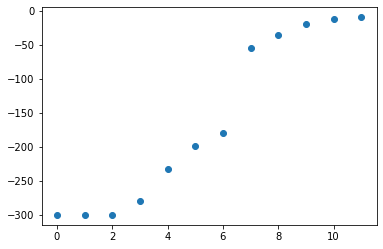

In [42]:
#good threshold would be between 1e-40, 1e-50
plt.scatter(x = np.arange(len(y)), y = np.sort(y))
plot_dictionary['Kruskal_Scatterv2'] = plt.gca().get_figure()

In [43]:
#suggests top 7
y

array([-300.        , -300.        , -231.86022107, -300.        ,
       -198.51192248, -280.05280272, -179.22053103,  -54.3262174 ,
        -34.62891187,  -19.38221408,  -12.45565475,   -9.18774293])

__Use Top 100 PCs__

In [57]:
pca.select_top_pcs(criteria = 'evalue', n_top_pcs = 100)

In [58]:
reduced_matrix = pca.use_top_pcs()

In [59]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [60]:
y = np.log10(np.array(kruskal)+1e-300)

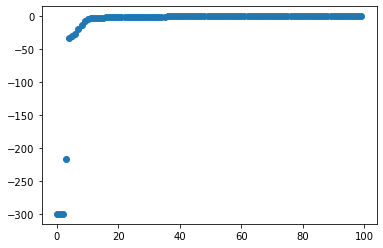

In [61]:
plt.scatter(x = np.arange(len(y)), y = np.sort(y))
plot_dictionary['Kruskal_Scatterv3'] = plt.gca().get_figure()

In [62]:
#having to include 100 components, degrade quality of clustring- only finds 8 or so significant PC's
y

array([-3.00000000e+02, -3.00000000e+02, -2.16156262e+02, -3.00000000e+02,
       -3.26781404e+01, -1.34977855e+01, -2.71266168e+01, -3.05560356e+01,
       -1.96772793e+01, -1.59304068e+00, -6.67507082e+00, -4.89014824e+00,
       -9.92908730e-01, -4.86456448e-01, -2.81768112e-01, -4.65505727e-01,
       -2.06267377e+00, -2.77907400e-02, -2.99561506e+00, -2.00552106e+00,
       -2.02651343e-01, -8.70073706e-02, -1.49280851e-01, -6.08984028e-01,
       -1.37005938e-01, -1.16383249e-01, -1.30368760e+00, -3.14283927e-01,
       -2.20269020e-01, -3.50734050e-01, -1.03673438e-01, -1.29570560e-01,
       -2.56685184e+00, -2.34726457e+00, -7.92762461e-02, -2.00603825e-02,
       -5.52726302e-01, -7.89521392e-01, -6.98931655e-01, -1.75982869e-01,
       -2.10405124e-01, -3.67913584e-01, -3.33844575e-01, -3.66165227e-01,
       -6.10176434e-01, -1.47748114e+00, -1.57405423e-01, -5.52415625e-02,
       -3.66015169e-02, -6.92467487e-01, -8.15898489e-02, -1.41127105e-01,
       -1.26118323e-01, -

In [63]:
#in all cases strongly favors 0-4, 6-8
np.sort(y)

array([-3.00000000e+02, -3.00000000e+02, -3.00000000e+02, -2.16156262e+02,
       -3.26781404e+01, -3.05560356e+01, -2.71266168e+01, -1.96772793e+01,
       -1.34977855e+01, -6.67507082e+00, -4.89014824e+00, -2.99561506e+00,
       -2.56685184e+00, -2.34726457e+00, -2.06267377e+00, -2.00552106e+00,
       -1.63831540e+00, -1.59304068e+00, -1.47748114e+00, -1.30368760e+00,
       -9.92908730e-01, -7.89521392e-01, -7.72459097e-01, -7.05634745e-01,
       -6.98931655e-01, -6.92467487e-01, -6.84570190e-01, -6.10176434e-01,
       -6.08984028e-01, -5.52726302e-01, -5.06439822e-01, -4.95295938e-01,
       -4.86456448e-01, -4.75351742e-01, -4.65505727e-01, -4.27750020e-01,
       -3.93422926e-01, -3.67913584e-01, -3.66165227e-01, -3.60923791e-01,
       -3.50734050e-01, -3.38829029e-01, -3.33844575e-01, -3.30270654e-01,
       -3.14283927e-01, -2.81768112e-01, -2.68886849e-01, -2.45689621e-01,
       -2.35585881e-01, -2.28464861e-01, -2.20269020e-01, -2.13047217e-01,
       -2.10405124e-01, -

__Use Top 25 PCQC__

In [64]:
pca.select_top_pcs(criteria = '100.0_Percentile', n_top_pcs = 25)

In [65]:
reduced_matrix = pca.use_top_pcs()

In [66]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [67]:
y = np.log10(np.array(kruskal)+1e-300)

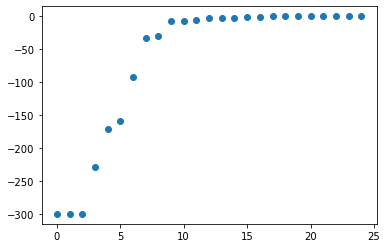

In [68]:
plt.scatter(x = np.arange(len(y)), y = np.sort(y))
plot_dictionary['Kruskal_Scatterv4'] = plt.gca().get_figure()

In [69]:
#selecting just 0-7,10
y

array([-2.28319807e+02, -3.00000000e+02, -3.00000000e+02, -3.00000000e+02,
       -1.59164398e+02, -2.98558410e+01, -3.31172483e+01, -1.71586096e+02,
       -7.34559301e+00, -5.64674594e+00, -9.24559816e+01, -6.70395358e-01,
       -4.03145720e-01, -7.74787117e+00, -2.11999286e+00, -5.53581164e-02,
       -2.39335740e+00, -2.48462807e+00, -4.56876307e-01, -2.26854918e-01,
       -3.06403411e-01, -5.24161732e-02, -6.76122285e-02, -1.31777592e-01,
       -6.08764146e-02])

__Use Top 20 PCQC__

In [70]:
pca.select_top_pcs(criteria = '99.0_Percentile', n_top_pcs = 20)

In [71]:
reduced_matrix = pca.use_top_pcs()

In [72]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [73]:
y = np.log10(np.array(kruskal)+1e-300)

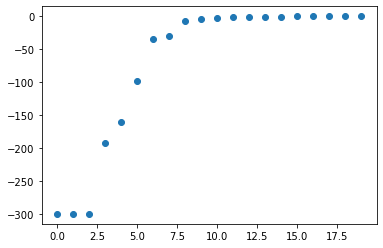

In [74]:
plt.scatter(x = np.arange(len(y)), y = np.sort(y))
plot_dictionary['Kruskal_Scatterv5'] = plt.gca().get_figure()

In [75]:
y

array([-3.00000000e+02, -3.00000000e+02, -3.00000000e+02, -1.92300640e+02,
       -2.96915942e+01, -1.60948232e+02, -3.39391420e+01, -9.89808693e+01,
       -6.74357856e+00, -2.46125089e+00, -7.75076519e-01, -2.48312299e-01,
       -5.24411939e-01, -8.48492251e-02, -1.54081698e-01, -1.03535217e-01,
       -7.65538663e-01, -1.54631047e+00, -4.11566163e+00, -3.15727331e-01])

### Top 15 PCQC

In [76]:
pca.select_top_pcs(criteria = '99.0_Percentile', n_top_pcs = 15)

In [77]:
reduced_matrix = pca.use_top_pcs()

In [78]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [79]:
y = np.log10(np.array(kruskal)+1e-300)

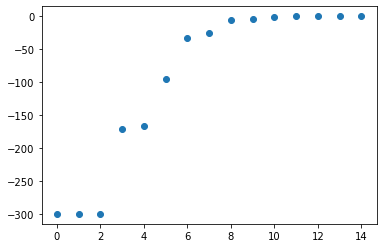

In [80]:
plt.scatter(x = np.arange(len(y)), y = np.sort(y))
plot_dictionary['Kruskal_Scatterv6'] = plt.gca().get_figure()

In [81]:
#first 0-8,
y

array([-3.00000000e+02, -3.00000000e+02, -3.00000000e+02, -1.66687982e+02,
       -2.57111407e+01, -1.71901661e+02, -3.23778336e+01, -9.50302281e+01,
       -5.77492565e+00, -4.98114358e+00, -1.11376803e+00, -3.75108369e-01,
       -3.40368230e-01, -7.99920721e-02, -4.53048367e-01])

### Confirm Choice

In [82]:
reduced_matrix = reduced_matrix[:,[0,1,2,3,4,5,6,7,10]]

In [83]:
_, kruskal = compute_best_pcs(reduced_matrix, 15, .8, threshold = 1)

In [84]:
y = np.log10(np.array(kruskal)+1e-300)

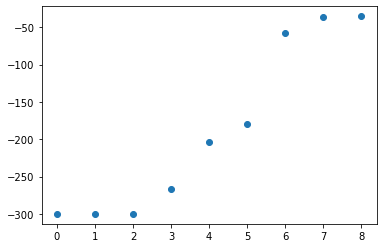

In [85]:
plt.scatter(x = np.arange(len(y)), y = np.sort(y))

In [86]:
#first 0-9, 12,14,16
y

array([-300.        , -300.        , -300.        , -204.34243393,
        -35.35267676, -266.95120257,  -57.38371171, -179.81885753,
        -35.95619141])

### Permutation Test

In [87]:
mtrx = data.values

In [88]:
perm_test = permutation_test(mtrx, trials = 20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [89]:
sorted_svalues = -1*np.sort(-1*perm_test.max())

In [90]:
sorted_svalues

array([90.00097826, 89.56913515, 89.30374594, 89.12014401, 88.77852247,
       88.57170317, 88.43422258, 88.33353294, 88.1868859 , 87.9622151 ,
       87.78492998, 87.6596762 , 87.54247137, 87.28790502, 87.2117854 ,
       87.05022857, 86.91508001, 86.77298469, 86.61843696, 86.49345258,
       86.39925061, 86.28605206, 86.17976397, 86.08690645, 85.92619274,
       85.847496  , 85.62574205, 85.57351205, 85.43771664, 85.32185334,
       85.22358124, 85.10637965, 84.95962611, 84.92984569, 84.85697757,
       84.79441439, 84.58943052, 84.535686  , 84.3733605 , 84.31162098,
       84.20894094, 84.14442209, 84.0164731 , 83.91524134, 83.81387364,
       83.71260241, 83.67985777, 83.60661046, 83.46229969, 83.41121621,
       83.33922954, 83.17078633, 83.10170353, 83.01666837, 82.92242059,
       82.86405556, 82.78921148, 82.67363936, 82.63544967, 82.50441556,
       82.44120652, 82.33038203, 82.23204414, 82.17591494, 82.12742059,
       82.03535983, 81.95469383, 81.85963743, 81.76635478, 81.71

In [91]:
pca.singular_values

array([290.99080096, 222.17348561, 202.94800732, 186.82638292,
       112.53282036, 102.52284537,  96.43508072,  92.33988782,
        90.72860407,  90.05341191,  88.92259855,  88.35249282,
        88.22623294,  88.11364853,  87.65796801,  87.43456737,
        87.1606445 ,  86.91521122,  86.58669766,  86.47472017,
        86.40869143,  86.2086503 ,  85.98342176,  85.92890392,
        85.75879114,  85.59200334,  85.47530624,  85.3160535 ,
        85.21694634,  85.09497396,  84.95855928,  84.9111451 ,
        84.72571183,  84.57164795,  84.4181872 ,  84.38023223,
        84.12736681,  84.05184353,  84.01828338,  83.97280125,
        83.82870271,  83.71067799,  83.61329409,  83.46492497,
        83.32578124,  83.27102456,  83.19257429,  83.09471083,
        83.08857298,  82.83296593,  82.74693977,  82.63202112,
        82.53089949,  82.45108963,  82.4074684 ,  82.33658628,
        82.19998444,  82.08089209,  81.99928917,  81.94803487,
        81.76081965,  81.64134904,  81.55767504,  81.52

In [92]:
np.sum(pca.singular_values > sorted_svalues)

19

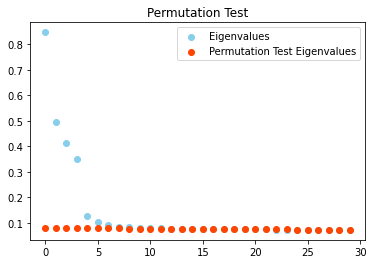

In [94]:
plt.scatter(x = np.arange(0,30), y = 1e-5*np.power(pca.singular_values[0:30],2), color = 'skyblue', label = 'Eigenvalues')
plt.scatter(x = np.arange(0,30), y = 1e-5*np.power(sorted_svalues[0:30],2), color = 'orangered', 
            label = 'Permutation Test Eigenvalues')
plt.legend()
plt.title('Permutation Test')
plot_dictionary['PermTest'] = plt.gca().get_figure()

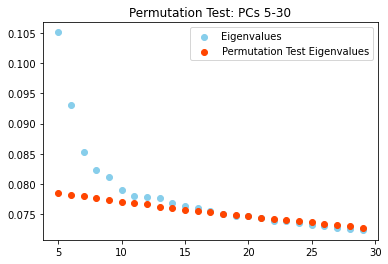

In [96]:
plt.scatter(x = np.arange(5,30), y = 1e-5*np.power(pca.singular_values[5:30],2), color = 'skyblue', label = 'Eigenvalues')
plt.scatter(x = np.arange(5,30), y = 1e-5*np.power(sorted_svalues[5:30],2), color = 'orangered', 
            label = 'Permutation Test Eigenvalues')
plt.legend()
plt.title('Permutation Test: PCs 5-30')
plot_dictionary['PermTestPcs5-30'] = plt.gca().get_figure()

In [97]:
def compute_e_ratio(svalues,perm):
    answer = np.divide(svalues,perm)
    answer = np.power(answer,2) #use eigenvalues
    df = pd.DataFrame(answer,columns = ['E_Ratio'])
    return df

In [98]:
sorted_medians = -1*np.sort(-1*perm_test.median())
e_ratio = compute_e_ratio(pca.singular_values,sorted_medians)

In [99]:
#top 7, possibly top 8
e_ratio[0:10]

,E_Ratio
0,10.541040
1,6.191321
2,5.202596
3,4.427348
4,1.613960
5,1.346133
6,1.194344
7,1.099935
8,1.065844
9,1.054444


### Permutation test 
1. Top 19 look stat significant
2. Only top 7-8 look like there are large differences

In [110]:
with PdfPages(output_plots) as pdf:
    for title in plot_dictionary.keys():
        pdf.savefig(plot_dictionary[title])